# Task 1
# System Modeling

The system state is represented by the vector 𝑥 and it has been given in the assignment:

$\mathbf{x} = \begin{bmatrix} \mathbf{p} \\ \dot{\mathbf{p}} \end{bmatrix}$

where:
- $ \mathbf{p}$ is the 3x1 position vector.
- $\dot{\mathbf{p}}$ is the 3x1 velocity vector (time derivative of position).

The input vector to the system is given by $\mathbf{u} = m\ddot{\mathbf{p}}$, where \(m\) is the mass of the drone (27g), and $\mathbf{p}$ is the 3x1 acceleration vector (second time derivative of position).

The observations $\mathbf{z}$ are either the position or the velocity of the robot, depending on the data file.


## Process Model

The continuous-time state-space model is given by:

$ \dot{\mathbf{x}} = \mathbf{Ax} + \mathbf{Bu} $

where:
1. $\mathbf{A}$ is the state transition matrix.
2. $\mathbf{B}$ is the control-input matrix.

Now we can replace the state space as $\mathbf{x} = \begin{bmatrix} \mathbf{p} \\ \dot{\mathbf{p}} \end{bmatrix}$
Then we can obtaain the A matrix as:
$\mathbf{A} = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$

The mass is taken in Kgs.

$\mathbf{B} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
1/0.027 & 0 & 0\\
0 & 1/0.027 & 0\\
0 & 0 & 1/0.027\\
\end{bmatrix}$

Thus we can write the final equation for the process model as \\
$\dot{\mathbf{x}} = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix} \mathbf{x} +
\begin{bmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0\\
1/0.027 & 0 & 0 \\
0 & 1/0.027 & 0 \\
0 & 0 & 1/0.027  \\
\end{bmatrix} \mathbf{u}$


To discretize the continuous-time model, use the following formulas:

$\mathbf{F}= (I + A \Delta t)$

$
\mathbf{F} = \begin{bmatrix}
1 & 0 & 0 & \Delta t & 0 & 0 \\
0 & 1 & 0 & 0 & \Delta t & 0 \\
0 & 0 & 1 & 0 & 0 & \Delta t \\
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$

$G=  B \Delta t$

$ G = \begin{bmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0\\
\Delta t/0.027 & 0 & 0 \\
0 & \Delta t/0.027 & 0 \\
0 & 0 & \Delta t/0.027  \\
\end{bmatrix}$


## Measurement Model

The measurement equation is given by:

$ \mathbf{z} = \mathbf{Cx} $

where:
- $\mathbf{C}$ is the measurement matrix.

Depending on whether the measurement is position or velocity, set $\mathbf{C
}$ accordingly:
- For position measurement:
   $\mathbf{C} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
\end{bmatrix}$

- For velocity measurement:
  $\mathbf{C} = \begin{bmatrix}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}$


# Task 2:

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plot


def initialize_system():
  x_hat = np.zeros((6, 1))
  P = np.eye(6) * 1e-3
  return x_hat, P

def define_matrices(m):
  # Defining the matrices derived in previous task
  A = np.array([[0, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0]])

  B = np.array([[0, 0, 0],
                [0, 0, 0],
                [0, 0, 0],
                [1/m, 0, 0],
                [0, 1/m, 0],
                [0, 0, 1/m]])

  C_position = np.array([[1, 0, 0, 0, 0, 0],
                          [0, 1, 0, 0, 0, 0],
                          [0, 0, 1, 0, 0, 0]])

  C_velocity = np.array([[0, 0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 1, 0],
                          [0, 0, 0, 0, 0, 1]])

  return A, B, C_position, C_velocity

# Function to load file
def load_data(file_path):
  return np.loadtxt(file_path, delimiter=',')

# Funtion to plot 3D trajectory
def plot_trajectory(trajectory_x, trajectory_y, trajectory_z):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(trajectory_x, trajectory_y, trajectory_z)
  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')
  plt.show()


#Kalman Filter

In [30]:
def predict(x_hat, P, A, B, G, ut, sigma_a, delta_t):

  F = np.eye(6) + delta_t * A   # Calculating the F matrix from A in order to convert continous to discrete system
  # Prediction step
  x_hat = F @ x_hat + G @ ut # Using the formula to predict the mean
  P = F @ P @ F.T + G @ G.T * sigma_a * sigma_a # Using the formula to predict the convariance
  return x_hat, P

def update(x_hat, P, C, R_position, z):
  # Update step
  K = P @ C.T @ np.linalg.inv(C @ P @ C.T + R_position) # Calculating the Kalman Gain using the formula
  x_hat = x_hat + K @ (z - C @ x_hat) # Updating the Mean and Covariance with the Kalman Gain and Measurement
  P = (np.eye(6) - K @ C) @ P
  return x_hat, P

def kalman_filter(data, A, B, C, R_position, sigma_a):
  x_hat, P = initialize_system()
  # Storing trajectories to plot it later
  trajectory_x = []
  trajectory_y = []
  trajectory_z = []

  # storing the previous timestamp
  previous_timestamp = 0

  for data_point in data:
    current_timestamp = data_point[0]
    delta_t = current_timestamp - previous_timestamp  # Calculating the difference in the time

    G = delta_t * B  # Calculating the G matrix
    ut = np.array(data_point[1:4]).reshape((3, 1))  # Extracting the control inputs from the data file
    z = data_point[4:].reshape((3, 1))              # Extracting the measurements from the data file

    # Prediction step
    x_hat, P = predict(x_hat, P, A, B, G, ut, sigma_a, delta_t)

    # Update step
    x_hat, P = update(x_hat, P, C, R_position, z)

    previous_timestamp = current_timestamp

    # Store the results for plotting
    trajectory_x.append(x_hat[0, 0])
    trajectory_y.append(x_hat[1, 0])
    trajectory_z.append(x_hat[2, 0])

  return trajectory_x, trajectory_y, trajectory_z


In [36]:
# Function to extract ground truth trajectory
def ground_truth(mocap_data):
  trajectory_x = []
  trajectory_y = []
  trajectory_z = []

  for data in mocap_data:
    z = data[4:]   # Extracting the measurements from the data file
    z = z.reshape((3, 1))
    # Store the results for plotting
    trajectory_x.append(z[0, 0])
    trajectory_y.append(z[1, 0])
    trajectory_z.append(z[2, 0])

  return trajectory_x, trajectory_y, trajectory_z

#Main Function


Plotting the Ground Truth


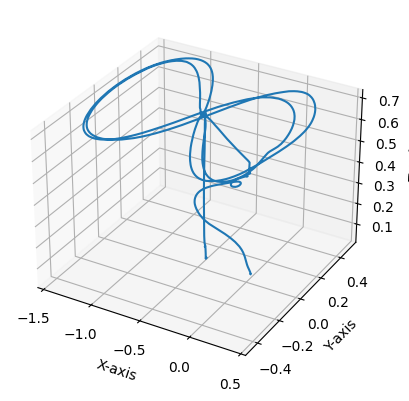

Trajectory Plot for Low Noise Data


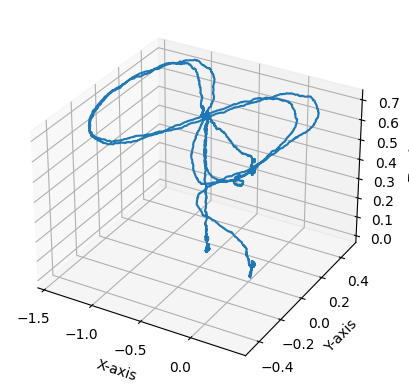

Trajectory Plot for High Noise Data


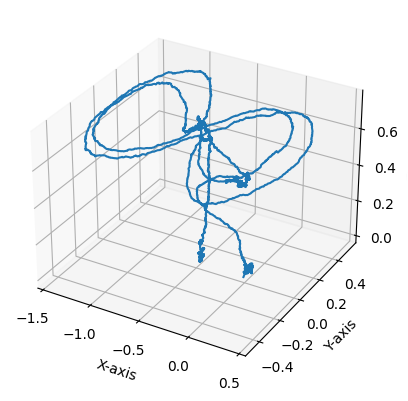

Trajectory Plot for Velocity Data


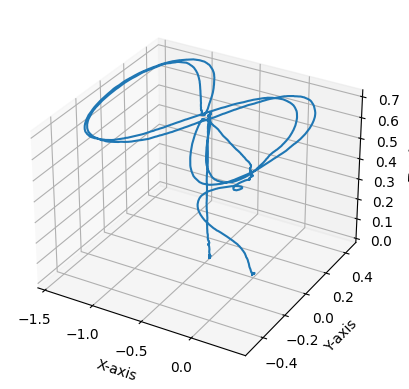

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plot
def main():
  # Parameters
  m = 0.027  #Mass in Kgs

  # Initialization
  x_hat, P = initialize_system()

  # Define Matrices A B and C as derivied in the Task 1
  A, B, C_position, C_velocity = define_matrices(m)

#--------------------------------------------------GROUND TRUTH ---------------------------------------------------------------------------------#
  # I have considered the motion capture system as the ground truth and thus we plot the ground truth first considering it does not have noise

  # Load data from CSV file
  motion_capture_data = np.loadtxt('/content/kalman_filter_data_mocap.txt', delimiter=',')
  # Calcute the ground truth
  trajectory_x, trajectory_y, trajectory_z = ground_truth(motion_capture_data)
  #PLotting the Ground truth
  print("Trajectory Plot for ground Truth Data")
  plot_trajectory(trajectory_x, trajectory_y, trajectory_z)


# -----------------------------------------------LOW NOISE DATA-----------------------------------------------------------------------------------------
  # Defining parameters for low noise data
  sigma_process_model_low_noise = 0.01

  # Measurement noise covariance matrix (R)
  sigma_measurement_model_low_noise = 0.05
  R_position_low_noise = np.eye(3) * sigma_measurement_model_low_noise**2
  file_path = '/content/kalman_filter_data_low_noise.txt'

  # Load data for low noise
  low_noise_data = load_data(file_path)

  # Kalman Filter
  trajectory_x, trajectory_y, trajectory_z = kalman_filter(low_noise_data, A, B, C_position, R_position_low_noise, sigma_process_model_low_noise)

  # Plot Trajectory
  print("Trajectory Plot for Low Noise Data")
  plot_trajectory(trajectory_x, trajectory_y, trajectory_z)

# -----------------------------------------------HIGH NOISE DATA-----------------------------------------------------------------------------------------
  # Defining parameters for high noise data
  sigma_process_model_high_noise =  0.0036

  # Measurement noise covariance matrix (R)
  sigma_measurement_model_high_noise = 0.2
  R_position_high_noise = np.eye(3) * sigma_measurement_model_high_noise**2
  file_path = '/content/kalman_filter_data_high_noise.txt'

  # Load data for high noise
  high_noise_data = load_data(file_path)

  # Kalman Filter
  trajectory_x, trajectory_y, trajectory_z = kalman_filter(high_noise_data, A, B, C_position, R_position_high_noise, sigma_process_model_high_noise)

  # Plot Trajectory
  print("Trajectory Plot for High Noise Data")
  plot_trajectory(trajectory_x, trajectory_y, trajectory_z)

# -----------------------------------------------VELOCITY DATA-----------------------------------------------------------------------------------------
  # Defining parameters for velocity data
  sigma_process_model_velocity_noise =  0.035

  # Measurement noise covariance matrix (R)
  sigma_measurement_model_velocity_noise = 0.05
  R_velocity_noise = np.eye(3) * sigma_measurement_model_velocity_noise**2
  file_path = '/content/kalman_filter_data_velocity.txt'

  # Load data for velocity file
  velocity_data = load_data(file_path)

  # Kalman Filter
  trajectory_x, trajectory_y, trajectory_z = kalman_filter(velocity_data, A, B, C_velocity, R_velocity_noise, sigma_process_model_velocity_noise)

  # Plot Trajectory
  print("Trajectory Plot for Velocity Data")
  plot_trajectory(trajectory_x, trajectory_y, trajectory_z)

if __name__ == "__main__":
  main()

# Extra part

I realised that for the velocity plotting the values of sigma were not affecting the trajectory to an observable extend hence in order to verify that my code works well for velocity as well. I have plotted the velocitities at every time instant. So if we observe for the z axis it makes sense as the dron goes up in z direction and then almost stays as the same altitude and then comes down we can observe two spikes in the graph that indicate that the code implementation is correct.

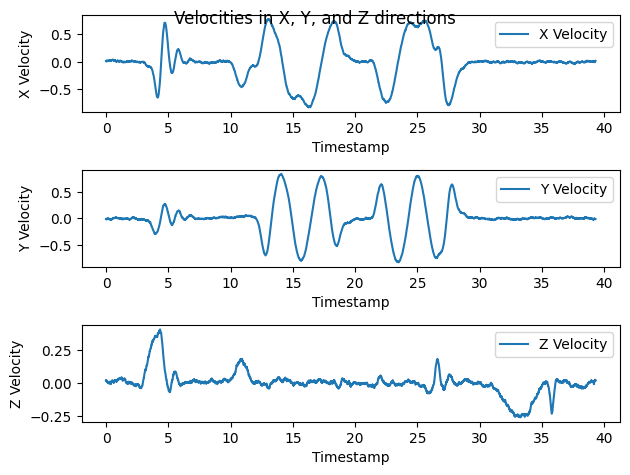

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import necessary for 3D plot


# Defining the A, B, and C
m = 0.027  # the mass is 0.027 Kgs

A = np.array([[0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])

B = np.array([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 0],
               [1/m, 0, 0],
               [0, 1/m, 0],
               [0, 0, 1/m]])


C_velocity = np.array([[0, 0, 0, 1, 0, 0],
                       [0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 0, 1]])

# Defining parameters for low noise data
sigma_process_model_velocity_noise =  0.0035

# Measurement noise covariance matrix (R)
sigma_measurement_model_velocity_noise = 0.05
R_velocity_noise = np.eye(3) * sigma_measurement_model_velocity_noise**2
file_path = '/content/kalman_filter_data_velocity.txt'

# Load data for velocity noise
velocity_data = load_data(file_path)

# Lists to store the velocities and timestamps
velocities_x = []
velocities_y = []
velocities_z = []
timestamps = []

previous_timestamp = 0
C = C_velocity

# Kalman filter loop
for data in velocity_data:
  current_timestamp = data[0]
  timestamps.append(current_timestamp)

  delta_t = current_timestamp - previous_timestamp
  # Defining the F and G matrix as per the formula discussed in the previous task
  F = np.eye(6) + delta_t * A
  G = delta_t * B

  # Extracting control inputs from the data
  ut = np.array(data[1:4])
  ut = ut.reshape((3, 1))

  # Prediction step
  x_hat = F @ x_hat + G @ ut  # Calculating the mean
  P = F @ P @ F.T + G @ G.T * sigma_process_model_velocity_noise * sigma_process_model_velocity_noise  # Calculating the Covariance

  # Update step
  K = P @ C.T @ np.linalg.inv(C @ P @ C.T + R_velocity_noise)  # Update based on measurement type
  z = data[4:]  # Extracting the measuremnets
  z = z.reshape((3, 1))
  x_hat = x_hat + K @ (z - C @ x_hat)
  P = (np.eye(6) - K @ C) @ P

  previous_timestamp = current_timestamp
  # Extract velocities from the state estimate
  velocity_x = x_hat[3, 0]
  velocity_y = x_hat[4, 0]
  velocity_z = x_hat[5, 0]

  # Store velocities
  velocities_x.append(velocity_x)
  velocities_y.append(velocity_y)
  velocities_z.append(velocity_z)

# Plot for X Velocity
plt.subplot(3, 1, 1)
plt.plot(timestamps, velocities_x, label='X Velocity')
plt.xlabel('Timestamp')
plt.ylabel('X Velocity')
plt.legend()

# Plot for Y Velocity
plt.subplot(3, 1, 2)
plt.plot(timestamps, velocities_y, label='Y Velocity')
plt.xlabel('Timestamp')
plt.ylabel('Y Velocity')
plt.legend()

# Plot for Z Velocity
plt.subplot(3, 1, 3)
plt.plot(timestamps, velocities_z, label='Z Velocity')
plt.xlabel('Timestamp')
plt.ylabel('Z Velocity')
plt.legend()

plt.tight_layout()
plt.suptitle('Velocities in X, Y, and Z directions')
plt.show()